# Tensorflow Projekt - Lösung

Wir werden nun mit unserem Tensorflow Projekt den Deep Learning Abschnitt abschließen. Dazu schauen wir uns die Effizienz von Deep Neural Nets an!

Wir werden einen [Bank Authentifizierungs Datensatz](https://archive.ics.uci.edu/ml/datasets/banknote+authentication) aus dem USI Repository verwenden.

Der Datensatz beinhaltet 5 Spalten:

* variance of Wavelet Transformed image (continuous)
* skewness of Wavelet Transformed image (continuous)
* curtosis of Wavelet Transformed image (continuous)
* entropy of image (continuous)
* class (integer)

Hier gibt "class" an, ob eine Banknote authentifiziert wurde oder nicht. 

Diese Art von Aufgabe ist perfekt für Neuronale Netze und Deep Learning! Folge den Anweisungen und löse die Aufgaben. Viel Spaß!

## Die Daten Laden

**Nutze Pandas, um die `bank_note_data.csv` Datei aus diesem verzeichnis zu öffnen.**

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('bank_note_data.csv')

**Schaue dir den head des DataFrames an.**

In [3]:
data.head()

Image.Var  Image.Skew  Image.Curt  Entropy  Class
0    3.62160      8.6661     -2.8073 -0.44699      0
1    4.54590      8.1674     -2.4586 -1.46210      0
2    3.86600     -2.6383      1.9242  0.10645      0
3    3.45660      9.5228     -4.0112 -3.59440      0
4    0.32924     -4.4552      4.5718 -0.98880      0

## Explorative Daten Analyse

Wir erzeugen einige Visualisierungen für einen allgemeinen Überblick:

**Importiere Seaborn und setzte matplotlib inline.**

In [4]:
import seaborn as sns
%matplotlib inline

**Erstelle ein `countplot` für die "Classes".**

In [5]:
# Dein Code hier

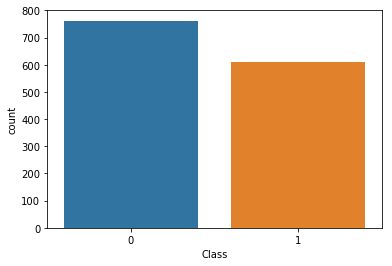

In [6]:
sns.countplot(x='Class',data=data)

**Erstelle ein `pairplot` und setze die `hue` zu Class.**

In [7]:
# Dein Code hier

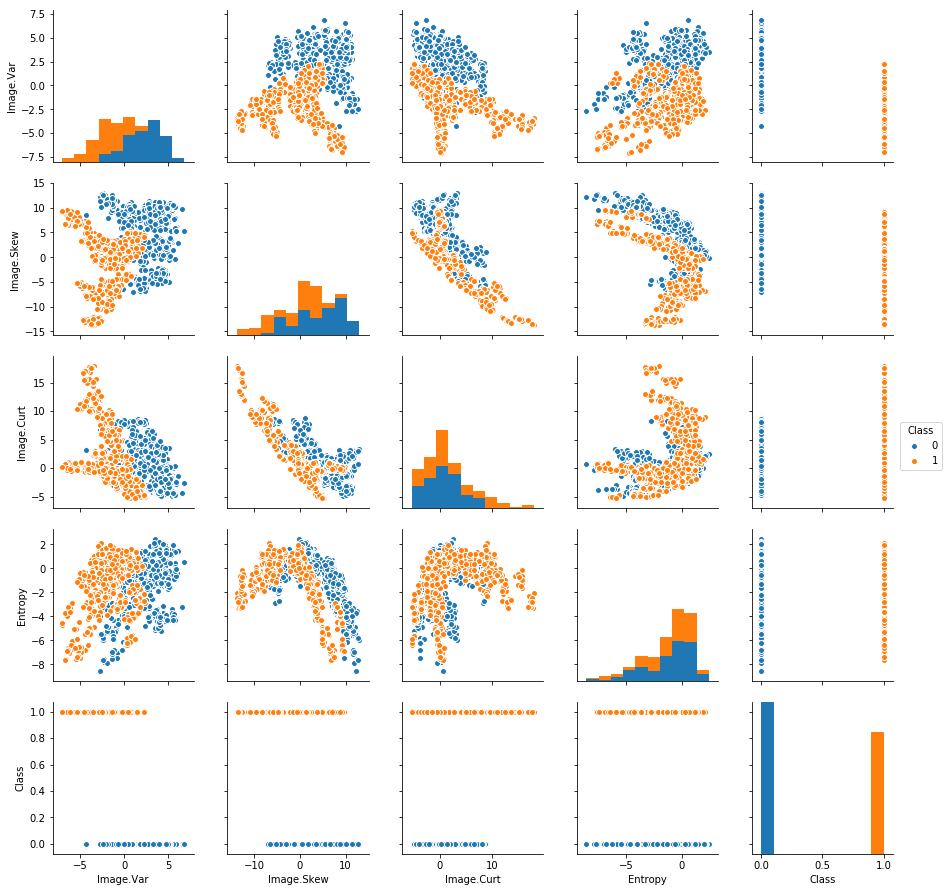

In [8]:
sns.pairplot(data,hue='Class')

## Daten Vorbereitung

Wenn wir Neuronale Netze und Deep Learning basierte Systeme nutzen, dann empfiehlt es sich üblicherweise die Daten zu Standardisieren. Dieser Schritt ist für unseren konkreten Datensatz nicht nötig, wir möchten aber doch einmal gemeinsam durchgehen.

### Standard Scaling

**Importiere `StandardScaler` aus `sklearn.preprocessing`.**

In [9]:
from sklearn.preprocessing import StandardScaler

**Erstelle ein StandardScaler() Objekt namens "scaler".**

In [10]:
scaler = StandardScaler()

**Fitte scaler auf die Features.**

In [11]:
scaler.fit(data.drop('Class',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

**Nutze die `transform()` Methode, um die Features in eine skalierte Version umzuwandeln.**

In [12]:
scaled_features = scaler.fit_transform(data.drop('Class',axis=1))

**Konvertiere die skalierten Features in einen DataFrame und sieh dir dessen Head an.**

In [13]:
df_feat = pd.DataFrame(scaled_features,columns=data.columns[:-1])
df_feat.head()

Image.Var  Image.Skew  Image.Curt   Entropy
0   1.121806    1.149455   -0.975970  0.354561
1   1.447066    1.064453   -0.895036 -0.128767
2   1.207810   -0.777352    0.122218  0.618073
3   1.063742    1.295478   -1.255397 -1.144029
4  -0.036772   -1.087038    0.736730  0.096587

## Train Test Split

**Erstelle zwei Objekte X und y, die die skalierten Feature-Werte und Labels beinhalten.**

In [14]:
X = df_feat

In [15]:
y = data['Class']

**Nutze die `as_matrix()` Methode auf X und y und überschreibe sie mit dem neuen Ergebnis.**

*Wir müssen dies tun, da Tensorflow mit Numpy Arrays arbeitet anstatt mit Pandas Series.**

In [16]:
X = X.as_matrix()
y = y.as_matrix()

**Nutze SciKit Learn, um Trainings- und Testsets zu erzeugen.**

In [17]:
from sklearn.cross_validation import train_test_split

/Users/renebrunner/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [24]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Contrib.learn

**Importiere `tesnorflow.contrib.learn` als "learn".**

In [25]:
import tensorflow as tf
feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(
  x_train)

**Erstelle ein Objekt namens "Classifier", das ein `DNNClassifier` aus learn ist. Setze `classes` auf 2  und `hidden_units` auf [10,20,10].** 

In [28]:
classifier = tf.contrib.learn.DNNClassifier(
  feature_columns=feature_columns, hidden_units=[10, 20, 10], n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1c271b9400>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/var/folders/k5/7wr8brn12mncybzndxyl31zr0000gq/T/tmp28fpti1n'}


**Jetzt fitte den classfier auf das Trainingsset. Nutze `steps=200` und `batch_size=20`.**

In [29]:
classifier.fit(x_train, y_train, steps=200, batch_size=20)

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Please switch to tf.train.get_global_step
INFO:tensorflow:Cre

DNNClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._BinaryLogisticHead object at 0x1c271b91d0>, 'hidden_units': [10, 20, 10], 'feature_columns': (_RealValuedColumn(column_name='', dimension=4, default_value=None, dtype=tf.float64, normalizer=None),), 'optimizer': None, 'activation_fn': <function relu at 0x1a22a17d08>, 'dropout': None, 'gradient_clip_norm': None, 'embedding_lr_multipliers': None, 'input_layer_min_slice_size': None})

## Modell Auswertung

**Nutze die `predict` Methode, um Vorhersagen für X_test zu erstellen.**

In [33]:
note_predictions = list(classifier.predict(x_test, as_iterable=True))

INFO:tensorflow:Restoring parameters from /var/folders/k5/7wr8brn12mncybzndxyl31zr0000gq/T/tmp28fpti1n/model.ckpt-200


**Jetzt erstelle Callsification Report und Confusion Matrix.**

In [34]:
from sklearn.metrics import classification_report,confusion_matrix

In [35]:
print(confusion_matrix(y_test,note_predictions))

[[225   1]
 [  0 186]]


In [36]:
print(classification_report(y_test,note_predictions))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       226
          1       0.99      1.00      1.00       186

avg / total       1.00      1.00      1.00       412



## Optionaler Vergleich

Dir sollten extrem akkurae Ergebnisse beim DNN Modell auffallen. Vergleichen wir das mit einem Random Forest Classifier für eine Einordnung der Ergebnisse.

**Nutze SciKit Learn, um einen Random Forest Classifier zu erstellen. Vergleiche anschließend Classification Report und Confusion Matrix.**

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
rfc = RandomForestClassifier(n_estimators=200)

In [39]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [40]:
rfc_preds = rfc.predict(X_test)

In [41]:
print(classification_report(y_test,rfc_preds))

             precision    recall  f1-score   support

          0       0.57      0.64      0.60       226
          1       0.48      0.40      0.44       186

avg / total       0.53      0.53      0.53       412



In [42]:
print(confusion_matrix(y_test,rfc_preds))

[[145  81]
 [111  75]]


Es sollte auch ziemlich gut, aber nicht genauso gut wie das DNN Modell abgeschnitten haben. Das hat dir hoffentlich die Power der DNNs gezeigt.

# Gut gemacht!